## Bike Sharing Assignment
Problem Statement: A bike sharing service provider, BoomBikes has recently suffered considerable dips in their revenues due to pandemic. They want to understand the affecting factors and their corresponding significance for shared bikes demand to make huge profits.

In [1]:
# import required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [2]:
# read the dataset
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
# check dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# dropping unnecessary columns
df.drop('dteday', axis='columns', inplace=True)

In [7]:
df.drop('instant', axis='columns', inplace=True)

In [8]:
df.drop('casual', axis='columns', inplace=True)

In [9]:
df.drop('registered', axis='columns', inplace=True)

In [10]:
# mapping necessary columns
df.season = df.season.map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [11]:
df.yr = df.yr.map({0:'2018',1:'2019'})

In [12]:
import calendar

In [13]:
df['mnth'] = df['mnth'].apply(lambda x:int(x)).apply(lambda x:calendar.month_name[x])

In [14]:
df['mnth'] =  df['mnth'].apply(lambda x:str(x[0:3]))

In [15]:
df['weekday'] = df['weekday'].apply(lambda x:int(x)).apply(lambda x:calendar.day_name[x])

In [16]:
df['weathersit'] = df['weathersit'].map({1:'mostly_clear',2:'mist_clouds',3:'ligt_rain_snow',4:'heavy_rain_snow'})

### Visualize numerical data
Create pair plot for numerical variables

<Figure size 1440x864 with 0 Axes>

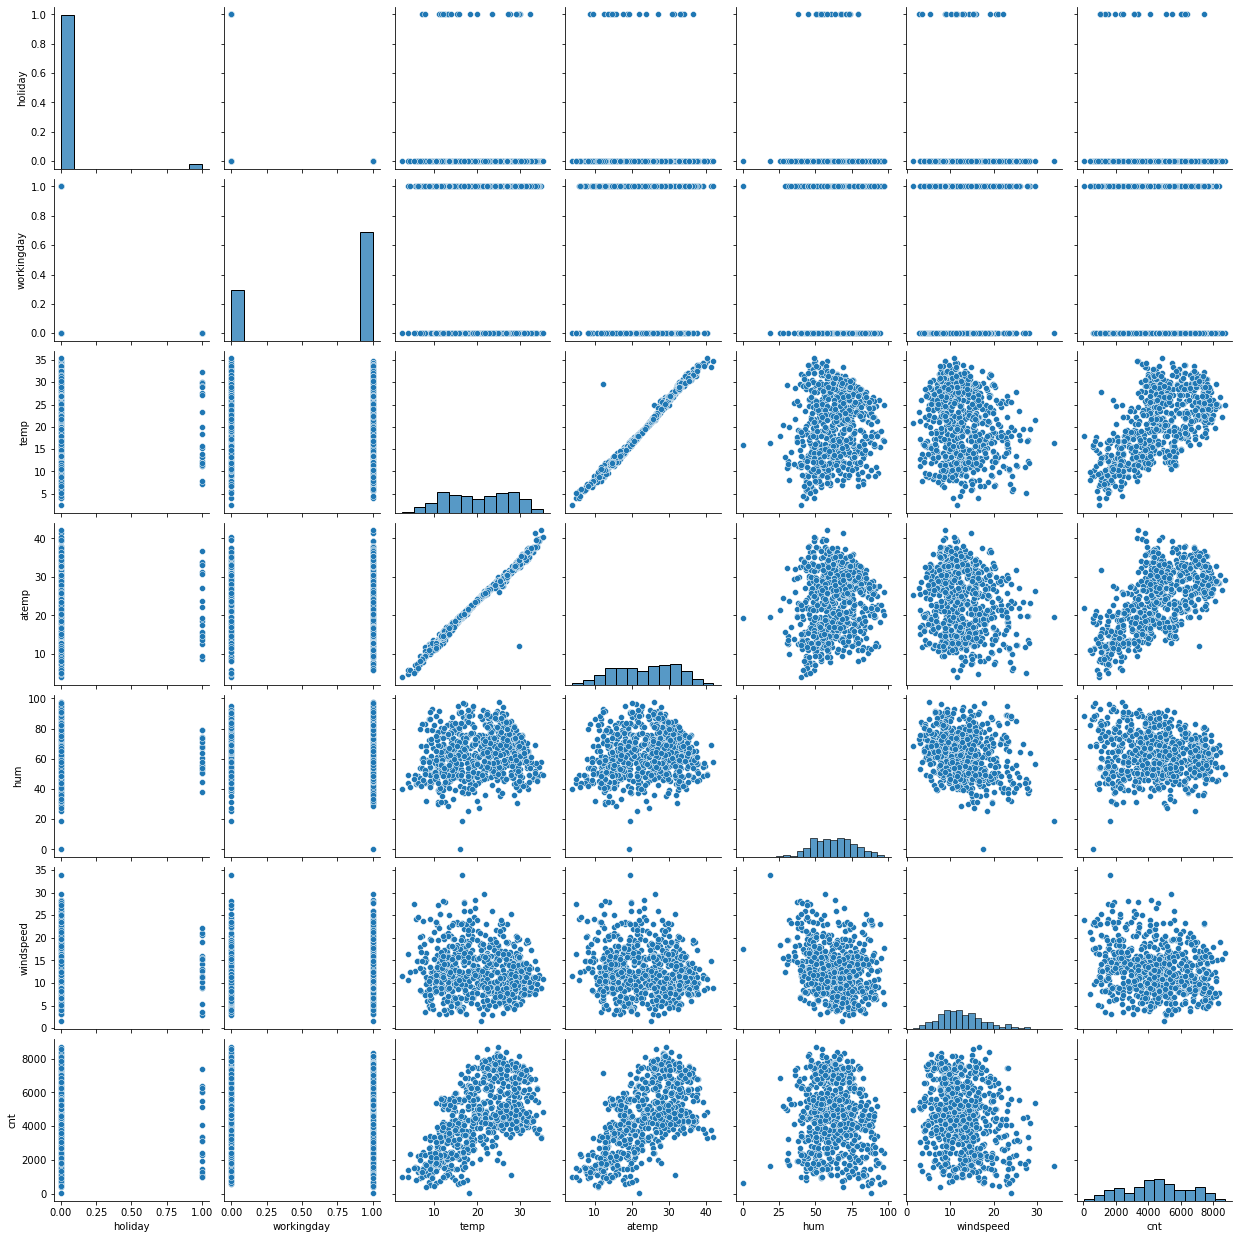

In [17]:
# a high correlation is seen in temp and feeling temp i.e. atemp
# linear pattern can be seen in temp and cnt
plt.figure(figsize=(20, 12))
sns.pairplot(df)
plt.show()

### Visualise categorical data
Create boxplot for categorical variables

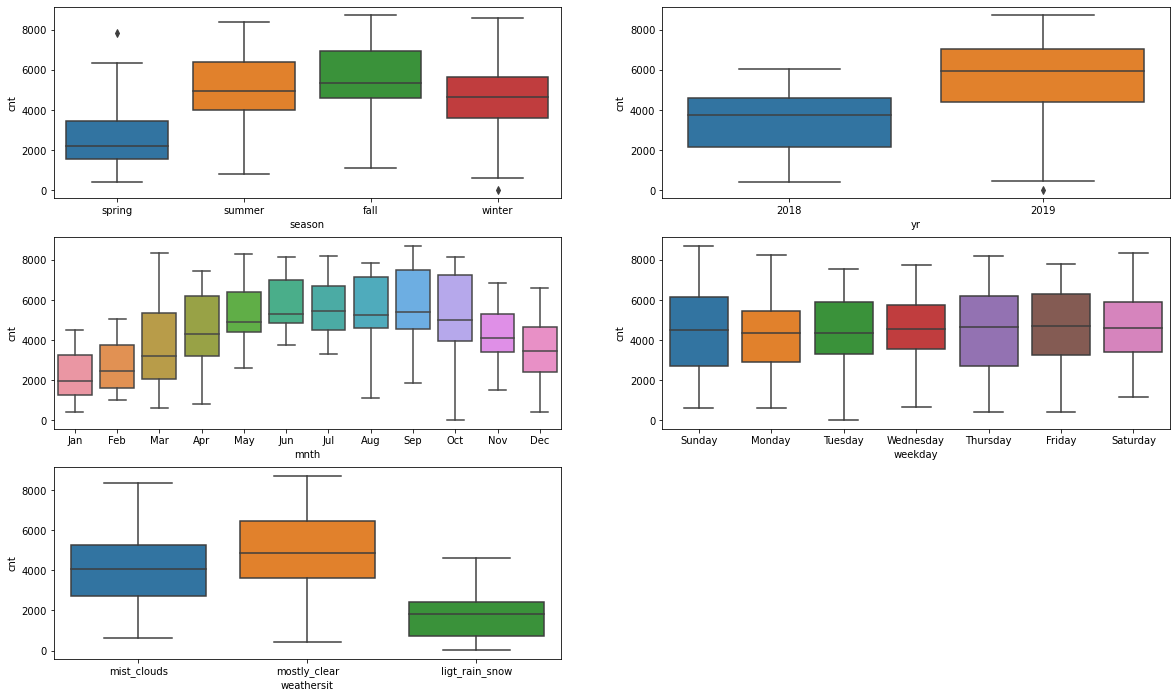

In [18]:
# Count was doubled in the following year 2019
# Mostly fall season and clear skies or partly cloud are preferred by riders
# No significance observed in weekdays
# Month and season may have high correlation
plt.figure(figsize=(20, 12))
plt.subplot(3,2,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,2,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,2,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,2,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

### Dummy Variables
Add dummy variables 

In [19]:
all_season = pd.get_dummies(df['season'], drop_first = True)

In [20]:
df = pd.concat([df,all_season], axis = 1)

In [21]:
# drop season as dummy variable is created for it
df.drop(['season'], axis = 1, inplace = True)

In [22]:
all_weather = pd.get_dummies(df['weathersit'], drop_first = True)

In [23]:
df = pd.concat([df,all_weather], axis = 1)

In [24]:
# drop weathersit as dummy variable is created for it
df.drop(['weathersit'], axis = 1, inplace = True)

In [25]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist_clouds,mostly_clear
0,2018,Jan,0,Sunday,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,2018,Jan,0,Monday,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,2018,Jan,0,Tuesday,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1
3,2018,Jan,0,Wednesday,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1
4,2018,Jan,0,Thursday,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1


#### Encode the values using LabelEncoder

In [26]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['yr'] = le.fit_transform(df['yr'])
df['mnth'] = le.fit_transform(df['mnth'])
df['weekday'] = le.fit_transform(df['weekday'])

In [27]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist_clouds,mostly_clear
0,0,4,0,3,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0
1,0,4,0,1,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0
2,0,4,0,5,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1
3,0,4,0,6,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1
4,0,4,0,4,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1


### Splitting data into test and train sets

In [28]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

#### Rescale the values using Minmax scaler

In [29]:
# scaling variables except dummy ones and yes/no types - using minmax scaler as std deviation is small
scaler = MinMaxScaler()
num_vars = ['mnth','weekday','hum','temp','atemp','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [30]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mist_clouds,mostly_clear
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.513699,0.503892,0.027397,0.502568,0.667808,0.537414,0.513175,0.649499,0.319463,0.515792,0.251712,0.246575,0.250000,0.342466,0.630137
std,0.500241,0.314849,0.163378,0.329803,0.471403,0.225336,0.211663,0.144219,0.168114,0.225336,0.434369,0.431387,0.433384,0.474941,0.483181
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.340113,0.331819,0.535852,0.199177,0.350696,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.545191,0.530558,0.653714,0.294764,0.522837,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.736512,0.690521,0.752361,0.410413,0.691872,1.000000,0.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [31]:
y_train = df_train.pop('cnt')
X_train = df_train

In [32]:
# Using RFE-Recursive feature elimination for Linear Regression
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [33]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 6)
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 4),
 ('holiday', False, 3),
 ('weekday', False, 9),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', False, 2),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 5),
 ('mist_clouds', True, 1),
 ('mostly_clear', True, 1)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'windspeed', 'spring', 'mist_clouds', 'mostly_clear'], dtype='object')

In [36]:
## highly correlatd variables removed
X_train.columns[~rfe.support_]

Index(['mnth', 'holiday', 'weekday', 'workingday', 'atemp', 'hum', 'summer',
       'winter'],
      dtype='object')

### Building model using statsmodel

In [37]:
### Building model using statsmodel, for the detailed statistics
X_train_rfe = X_train[col]

In [38]:
X_train_rfe = sm.add_constant(X_train_rfe)
# create a fitted model
lr_1 = sm.OLS(y_train,X_train_rfe).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     417.8
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.84e-206
Time:                        23:20:38   Log-Likelihood:                 531.49
No. Observations:                 584   AIC:                            -1049.
Df Residuals:                     577   BIC:                            -1018.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0434      0.030      1.460   

### Check for VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other

In [39]:
X = X_train_rfe.drop(['const'], axis=1)
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,mostly_clear,9.20
1,temp,9.12
4,mist_clouds,4.99
2,windspeed,4.22
3,spring,2.08
0,yr,2.06


We generally want a VIF that is less than 5.

### Dropping variable with high VIF

In [40]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mostly_clear', 1,)

In [41]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [42]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     395.6
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          6.68e-184
Time:                        23:20:39   Log-Likelihood:                 476.17
No. Observations:                 584   AIC:                            -940.3
Df Residuals:                     578   BIC:                            -914.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3009      0.020     15.036      

In [43]:
vif = pd.DataFrame()
X = X_train_lm.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.71
1,temp,3.55
0,yr,2.01
3,spring,1.55
4,mist_clouds,1.44


#### Heatmp for correlation check

<AxesSubplot:>

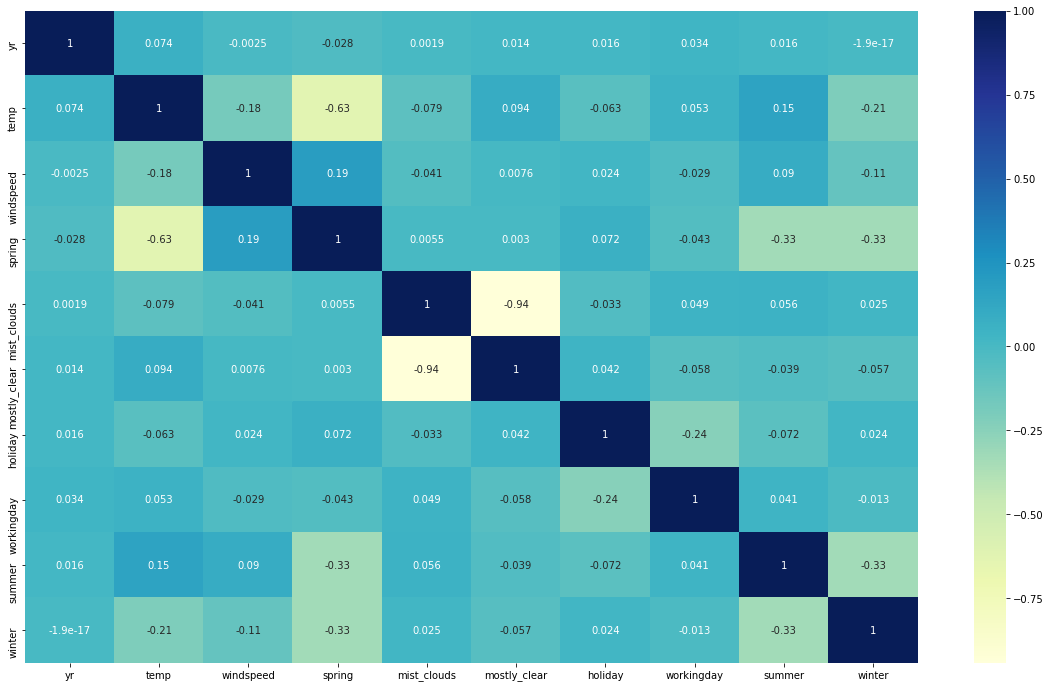

In [44]:
plt.figure(figsize = (20,12))
X = df_train[['yr', 'temp', 'windspeed', 'spring', 'mist_clouds', 'mostly_clear', 'holiday', 'workingday', 'summer',
       'winter']]                      
sns.heatmap(X.corr(),annot = True, cmap="YlGnBu")

#### Re-modeling based on correlation maps

In [45]:
## mostly_clear and mist_cloud have high correlation
X_train_new = df_train[['temp','yr','spring','holiday','mostly_clear','mnth']] 
X_train_new = sm.add_constant(X_train_new)
# create a fitted model
lr_3 = sm.OLS(y_train,X_train_new).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     361.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          1.04e-191
Time:                        23:20:40   Log-Likelihood:                 497.48
No. Observations:                 584   AIC:                            -981.0
Df Residuals:                     577   BIC:                            -950.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1304      0.019      6.939   

In [46]:
vif = pd.DataFrame()
X = X_train_new.drop(['const'], axis=1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.52
5,mnth,3.00
4,mostly_clear,2.63
1,yr,1.99
2,spring,1.29
3,holiday,1.04


As the VIFs and p-values both are within an acceptable range  we go ahead and make our predictions using this model only.

#### Residual Analysis
Check random  distribution of error terms and homoscedasticity of data

In [47]:
y_train_cnt = lr_3.predict(X_train_new)

Text(0.5, 0, 'Errors')

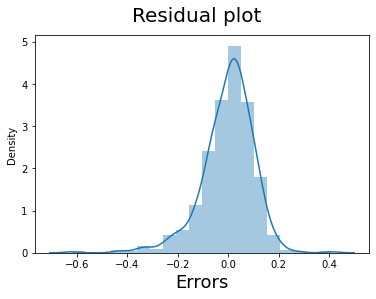

In [48]:
## Check histogram
fig = plt.figure()
res = y_train - y_train_cnt
sns.distplot((res), bins = 20)
fig.suptitle('Residual plot', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

### Predictions using final model

In [49]:
# Apply scaling to test
scaler = MinMaxScaler()
num_vars = ['mnth','weekday','hum','temp','atemp','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [50]:
# divide into x and y test
y_test = df_test.pop('cnt')
X_test = df_test

In [51]:
# Add columns and make predictions
X_test_lm = X_test[X.columns]
X_test_lm = sm.add_constant(X_test_lm)

In [52]:
y_pred = lr_3.predict(X_test_lm)

In [53]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7828125605609129

Text(0, 0.5, 'y_pred')

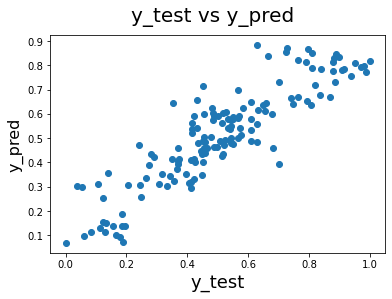

In [54]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)       

##### We can see that the equation of our best fitted line is:

$ cnt = 0.1168 + 0.3930  \times  temp + 0.2380  \times year - 0.1510 \times spring 
+ 0.0898 \times mostlyclear  - 0.0990 \times holiday + 0.0716 \times mnth $

Positive coefficient represents with increase in 1 unit of temp the cnt value will increase by 0.3930.
Similarly for other positive coefficient.
Negative coefficient represents with decrease in 1 unit of spring the cnt value will increase by 0.01510. 
Here we know that decrease in spring is fall season. So we can conclude that fall season is favorable by riders

Text(0, 0.5, 'Cnt')

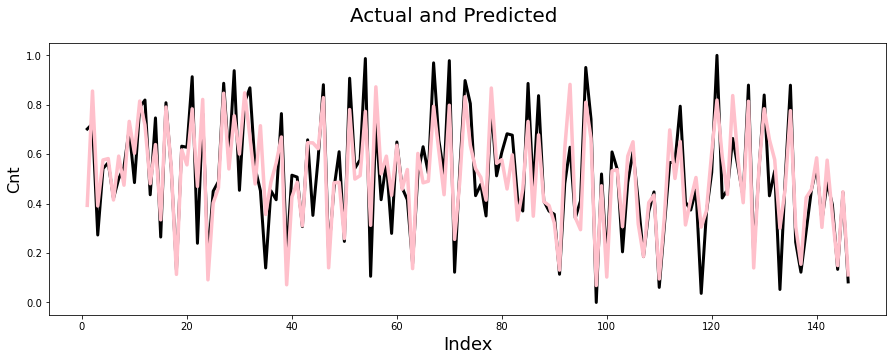

In [55]:
c = [i for i in range(1,147,1)]
fig = plt.figure(figsize = (15, 5))
plt.plot(c,y_test, color="black", linewidth=3.0, linestyle="-")
plt.plot(c,y_pred, color="pink",  linewidth=3.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20) 
plt.xlabel('Index', fontsize=18)
plt.ylabel('Cnt', fontsize=16)

Text(0, 0.5, 'Actual_Cnt-Predicted_Cnt')

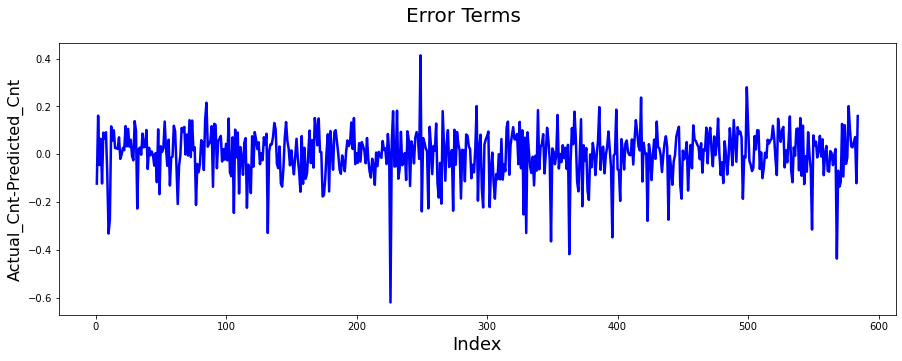

In [56]:
# Error terms
c = [i for i in range(1,585,1)]
fig = plt.figure(figsize = (15, 5))
plt.plot(c,y_train - y_train_cnt, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Actual_Cnt-Predicted_Cnt', fontsize=16)  